Epoch  1 | Train Acc: 0.7967 | Test Acc: 0.8337
Epoch  2 | Train Acc: 0.8436 | Test Acc: 0.8481
Epoch  3 | Train Acc: 0.8524 | Test Acc: 0.8574
Epoch  4 | Train Acc: 0.8584 | Test Acc: 0.8626
Epoch  5 | Train Acc: 0.8620 | Test Acc: 0.8683
Epoch  6 | Train Acc: 0.8653 | Test Acc: 0.8719
Epoch  7 | Train Acc: 0.8678 | Test Acc: 0.8748
Epoch  8 | Train Acc: 0.8695 | Test Acc: 0.8762
Epoch  9 | Train Acc: 0.8720 | Test Acc: 0.8780
Epoch 10 | Train Acc: 0.8733 | Test Acc: 0.8793
Epoch 11 | Train Acc: 0.8747 | Test Acc: 0.8801
Epoch 12 | Train Acc: 0.8758 | Test Acc: 0.8817
Epoch 13 | Train Acc: 0.8770 | Test Acc: 0.8827
Epoch 14 | Train Acc: 0.8781 | Test Acc: 0.8835
Epoch 15 | Train Acc: 0.8790 | Test Acc: 0.8843
Epoch 16 | Train Acc: 0.8801 | Test Acc: 0.8848
Epoch 17 | Train Acc: 0.8812 | Test Acc: 0.8852
Epoch 18 | Train Acc: 0.8820 | Test Acc: 0.8851
Epoch 19 | Train Acc: 0.8825 | Test Acc: 0.8849
Epoch 20 | Train Acc: 0.8834 | Test Acc: 0.8853

Classification Report:
              pr

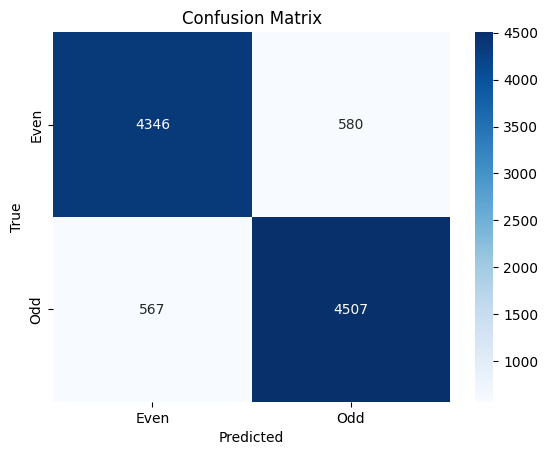

In [14]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 784).astype('float32') / 255.0
x_test = x_test.reshape(-1, 784).astype('float32') / 255.0

# Convert to even/odd labels (0=Even, 1=Odd)
y_train = (y_train % 2).astype('float32')
y_test = (y_test % 2).astype('float32')

# Hyperparameters
eta = 0.01  # Learning rate
delta = 0.1  # Constraint
epochs = 20
batch_size = 128

# Model parameters
W = tf.Variable(tf.random.normal((784, 1), stddev=0.1))
b = tf.Variable(tf.zeros((1,)))

# Dataset pipeline
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(2048).batch(batch_size)

# Store accuracy history
train_acc_history = []
test_acc_history = []

# Training loop
for epoch in range(epochs):
    total_correct = 0
    for x_batch, y_batch in train_dataset:
        y_batch = tf.reshape(y_batch, (-1, 1))

        # Forward pass
        with tf.GradientTape() as tape:
            z = tf.matmul(x_batch, W) + b
            D = tf.sigmoid(z)
            loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_batch, logits=z))

        # Compute gradients
        dW, db = tape.gradient(loss, [W, b])

        # Apply updates with constraint
        W.assign_sub(eta * dW)
        b.assign_sub(eta * db)

        # Track accuracy
        preds = tf.cast(D >= 0.5, tf.float32)
        total_correct += tf.reduce_sum(tf.cast(preds == y_batch, tf.int32))

    # Compute train and test accuracy
    train_acc = total_correct.numpy() / len(x_train)
    test_preds = tf.sigmoid(tf.matmul(x_test, W) + b) >= 0.5
    test_acc = tf.reduce_mean(tf.cast(test_preds == y_test.reshape(-1, 1), tf.float32)).numpy()

    train_acc_history.append(train_acc)
    test_acc_history.append(test_acc)

    print(f"Epoch {epoch+1:2d} | Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")

# Final evaluation
print("\nClassification Report:")
final_preds = test_preds.numpy().flatten()
print(classification_report(y_test, final_preds, target_names=['Even', 'Odd']))
# Confusion Matrix
cm = confusion_matrix(y_test, final_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Even', 'Odd'], yticklabels=['Even', 'Odd'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


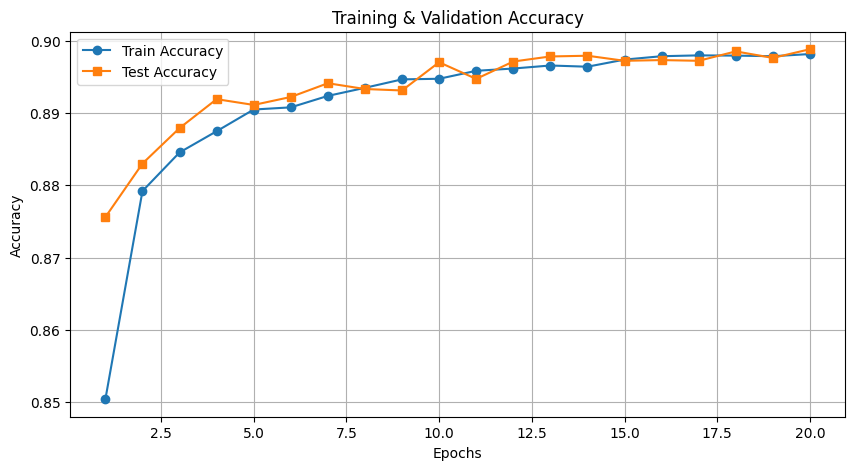

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), train_acc_history, label='Train Accuracy', marker='o')
plt.plot(range(1, epochs + 1), test_acc_history, label='Test Accuracy', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


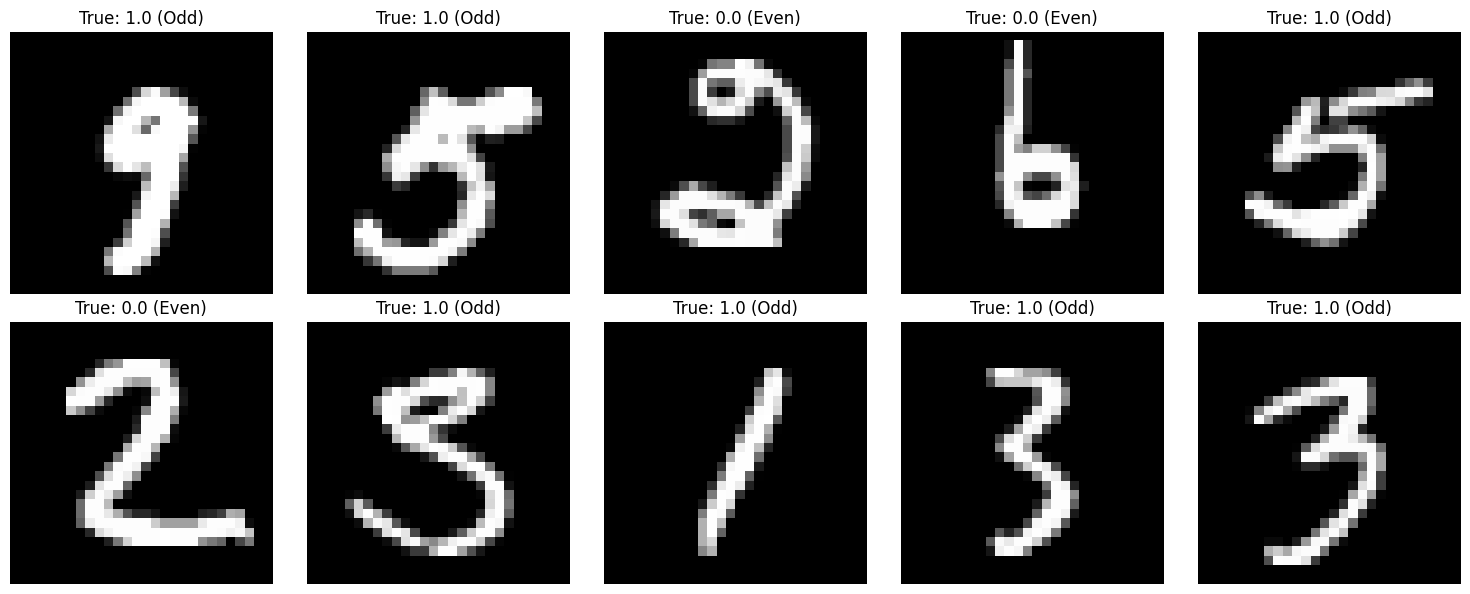

In [13]:

random_indices = np.random.choice(len(x_test), 10, replace=False)
plt.figure(figsize=(15, 6))
for idx, i in enumerate(random_indices):
    image = x_test[i].reshape(28, 28)
    true_digit = y_test[i]
    true_parity = "Even" if true_digit % 2 == 0 else "Odd"

    z = tf.matmul(x_test[i:i+1], W) + b
    D = tf.sigmoid(z).numpy()[0][0]
    pred_parity = "Odd" if D >= 0.5 else "Even"

    plt.subplot(2, 5, idx+1)
    plt.imshow(image, cmap='gray')
    plt.title(f"True: {true_digit} ({true_parity})")
    plt.axis('off')

plt.tight_layout()
plt.show()